In [16]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
# Define directory
ROOT = os.getcwd()
DATA_DIR = os.path.join(ROOT, 'data')

In [3]:
# Read data
df = pd.read_csv(os.path.join(DATA_DIR, 'company_data.csv'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   company_stock      1655 non-null   object
 1   company_name       1655 non-null   object
 2   company_industry   1655 non-null   object
 3   exchange           1655 non-null   object
 4   listed_volume      1655 non-null   object
 5   one_week_data      1655 non-null   object
 6   one_month_data     1655 non-null   object
 7   one_quarter_data   1655 non-null   object
 8   one_year_data      1655 non-null   object
 9   listing_date_data  1655 non-null   object
dtypes: object(10)
memory usage: 129.4+ KB


In [4]:
df.head()

,company_stock,company_name,company_industry,exchange,listed_volume,one_week_data,one_month_data,one_quarter_data,one_year_data,listing_date_data
0,A32,CTCP 32,Sản xuất các sản phẩm da và liên quan,UPCoM,"6,800,000",+19.30%,+14.48%,+25.93%,+36.26%,+53.10%
1,AAA,CTCP Nhựa An Phát Xanh,Sản xuất các sản phẩm nhựa và cao su,HOSE,"211,199,976",+8.85%,+5.13%,+9.49%,-9.61%,-0.58%
2,AAM,CTCP Thủy sản MeKong,Sản xuất thực phẩm,HOSE,"12,346,411",-0.88%,+2.27%,+1.35%,+3.07%,+38.19%
3,AAS,CTCP Chứng khoán SmartInvest,"Môi giới chứng khoán, hàng hóa, đầu tư tài chí...",UPCoM,"31,000,000",+1.69%,-10.45%,-73.57%,-52%,-52%
4,AAV,CTCP Việt Tiên Sơn Địa ốc,Bán buôn hàng tiêu dùng,HNX,"31,874,996",-1.41%,-13.58%,+14.75%,-20.45%,-26.82%


In [5]:
df.describe()

,company_stock,company_name,company_industry,exchange,listed_volume,one_week_data,one_month_data,one_quarter_data,one_year_data,listing_date_data
count,1655,1655,1655,1655,1655,1655,1655,1655,1655,1655
unique,1653,1651,84,3,1285,727,883,1116,1316,1535
top,VRE,CTCP Nam Việt,Xây dựng công nghiệp nặng và dân dụng,UPCoM,"5,000,000",0%,0%,0%,0%,0%
freq,2,2,126,904,29,655,461,296,171,75


In [6]:
price_df = df[['company_stock', 'one_week_data', 'one_month_data', 'one_quarter_data', 'one_year_data', 'listing_date_data']]
price_df.head()

,company_stock,one_week_data,one_month_data,one_quarter_data,one_year_data,listing_date_data
0,A32,+19.30%,+14.48%,+25.93%,+36.26%,+53.10%
1,AAA,+8.85%,+5.13%,+9.49%,-9.61%,-0.58%
2,AAM,-0.88%,+2.27%,+1.35%,+3.07%,+38.19%
3,AAS,+1.69%,-10.45%,-73.57%,-52%,-52%
4,AAV,-1.41%,-13.58%,+14.75%,-20.45%,-26.82%


In [7]:
def convert_price_rate(price):
    return pd.to_numeric(price[:-1].replace(',', ''))

for col in price_df.columns[1:]:
    price_df[col] = price_df[col].apply(convert_price_rate)

price_df.head()

,company_stock,one_week_data,one_month_data,one_quarter_data,one_year_data,listing_date_data
0,A32,19.30,14.48,25.93,36.26,53.10
1,AAA,8.85,5.13,9.49,-9.61,-0.58
2,AAM,-0.88,2.27,1.35,3.07,38.19
3,AAS,1.69,-10.45,-73.57,-52.00,-52.00
4,AAV,-1.41,-13.58,14.75,-20.45,-26.82


In [8]:
price_df
.describe()

,one_week_data,one_month_data,one_quarter_data,one_year_data,listing_date_data
count,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000
mean,1.371571,2.414218,10.267722,15.056230,468.762858
std,8.337382,16.531045,31.290744,75.271797,3333.004997
min,-61.710000,-80.000000,-78.180000,-91.270000,-99.610000
25%,0.000000,-2.620000,-0.740000,-12.970000,-40.000000
50%,0.000000,0.000000,3.700000,1.520000,17.830000
75%,2.990000,5.400000,19.470000,28.510000,130.995000
max,64.100000,225.000000,547.220000,1790.200000,80252.940000


In [12]:
# Make histogram about price change
def price_rate_hist(plot_df):
    fig, axs = plt.subplots(2, 2, figsize=(16,12))

    axs[0, 0].hist(plot_df[plot_df.columns[0]], bins=50)
    axs[0, 0].set_title(plot_df.columns[0])

    axs[0, 1].hist(plot_df[plot_df.columns[1]], bins=50)
    axs[0, 1].set_title(plot_df.columns[1])

    axs[1, 0].hist(plot_df[plot_df.columns[2]], bins=50)
    axs[1, 0].set_title(plot_df.columns[2])

    axs[1, 1].hist(plot_df[plot_df.columns[3]], bins=50)
    axs[1, 1].set_title(plot_df.columns[3])

    plt.tight_layout()
    plt.show()

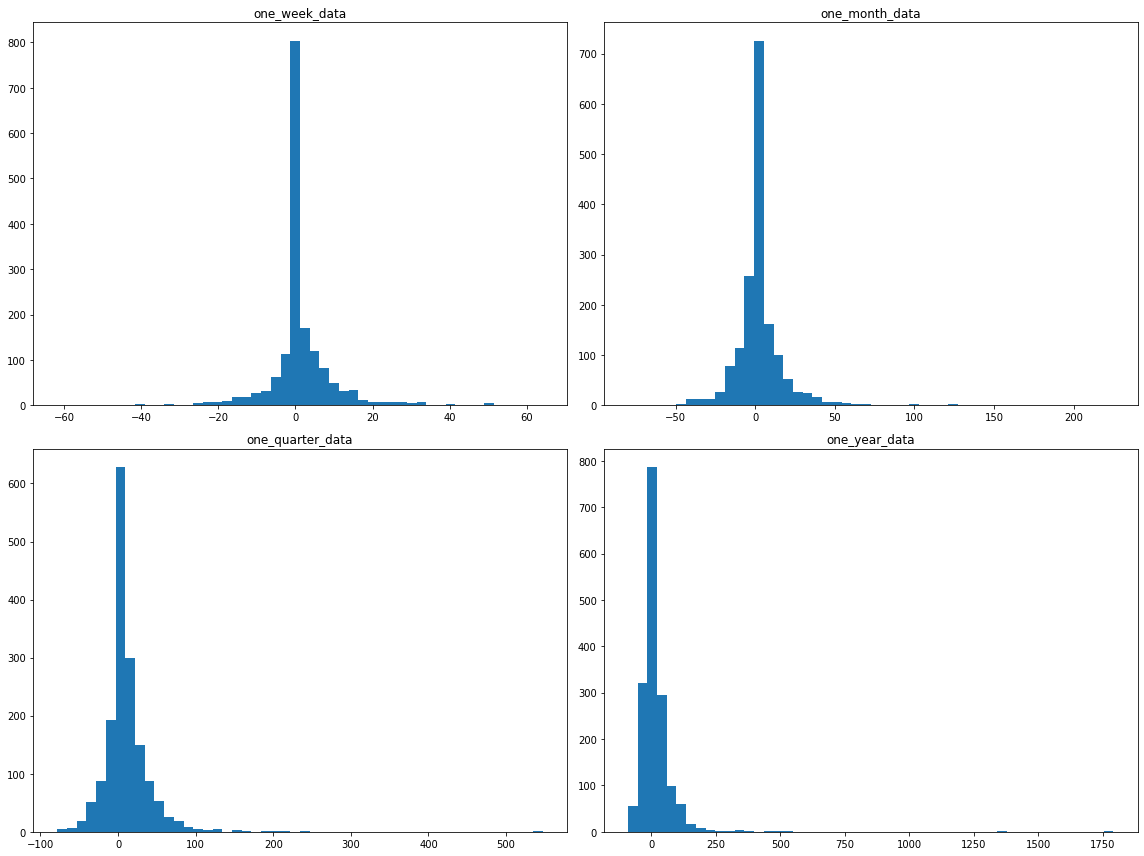

In [13]:
price_rate_hist(price_df[price_df.columns[1:]])

In [17]:
# Remove outlier in data by calculating z score
z_scores = zscore(price_df[price_df.columns[1:]])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

new_price_df = price_df[filtered_entries]
new_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 0 to 1654
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company_stock      1560 non-null   object 
 1   one_week_data      1560 non-null   float64
 2   one_month_data     1560 non-null   float64
 3   one_quarter_data   1560 non-null   float64
 4   one_year_data      1560 non-null   float64
 5   listing_date_data  1560 non-null   float64
dtypes: float64(5), object(1)
memory usage: 85.3+ KB


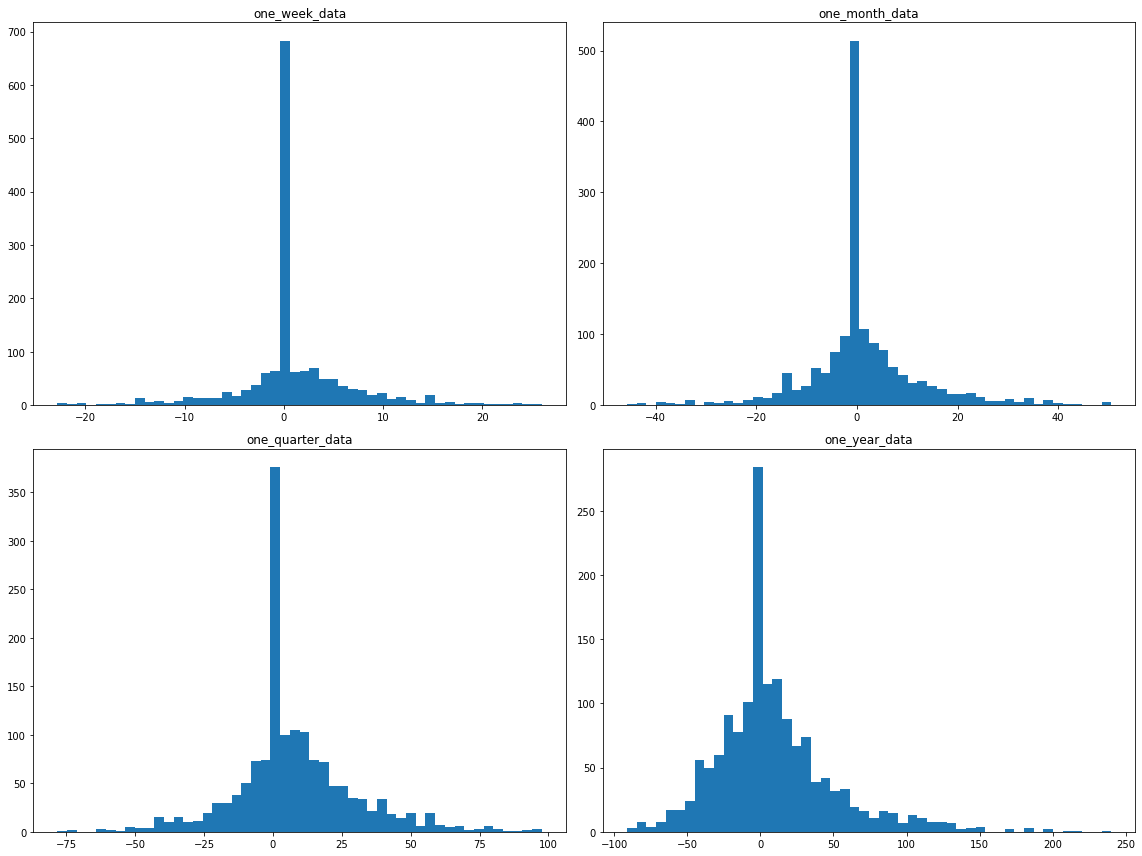

In [18]:
price_rate_hist(new_price_df[new_price_df.columns[1:]])

In [20]:
ranks = ['Very Bad', 'Bad', 'Normal', 'Good', 'Very Good']

new_price_df['Ranking'] = pd.qcut(new_price_df.one_year_data, q=5, labels=ranks)
new_price_df

,company_stock,one_week_data,one_month_data,one_quarter_data,one_year_data,listing_date_data,Ranking
0,A32,19.30,14.48,25.93,36.26,53.10,Very Good
1,AAA,8.85,5.13,9.49,-9.61,-0.58,Bad
2,AAM,-0.88,2.27,1.35,3.07,38.19,Normal
3,AAS,1.69,-10.45,-73.57,-52.00,-52.00,Very Bad
4,AAV,-1.41,-13.58,14.75,-20.45,-26.82,Very Bad
...,...,...,...,...,...,...,...
1650,YBC,0.00,0.00,-18.46,-36.54,129.14,Very Bad
1651,YBM,3.93,13.03,16.98,27.99,-58.66,Good
1652,YEG,-2.64,-3.28,-9.98,-9.80,-82.32,Bad
1653,YRC,0.00,0.00,0.00,0.00,-35.56,Bad


<AxesSubplot:>

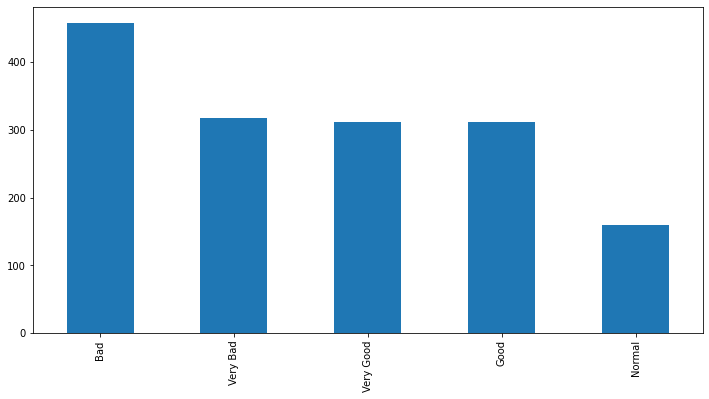

In [22]:
new_price_df.Ranking.value_counts().plot(kind='bar', figsize=(12, 6))